In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
from datetime import date

# ROUND 2

In [ ]:
# Instructions

# Show the dataframe shape.
# Standardize header names.
# Which columns are numerical?
# Which columns are categorical?
# Check and deal with NaN values.
# Datetime format - Extract the months from the dataset and store in a separate column. 
# Then filter the data to show only the information for the first quarter , ie. January, February and March. 
# Hint: If data from March does not exist, consider only January and February.

In [ ]:
data = pd.read_csv('marketing_customer_analysis.csv')

data = data.drop(['Unnamed: 0'],axis=1)

data # This also shows the shape (10910 x 25)

In [ ]:
print(data.columns) # Look for standardized headers. The dataset headers seem okay already? Perhaps lowercase?

cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())
data.columns = cols

data # To confirm the for loop worked on the headers

In [ ]:
print(data.dtypes)

# Categorical: All columns with 'object' type

# Numerical: All columns with 'float64' and 'int64' types

In [ ]:
sum(data.duplicated()) # check for duplicates

data.drop_duplicates(inplace=True) # remove duplicates

sum(data.duplicated()) # confirm that duplicates have been removed

In [ ]:
# Looking at data for how to address null values

data.isna().sum()

In [ ]:
round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

# Based on the outputs of null_df, I would prefer to remove the 'vehicle class' column altogether and drop rows with >0 nulls 
# (It's a large dataset so should not introduce any bias)

In [ ]:
data['state'].value_counts() # Judging by this quick look at the data, probably best to just remove rows with NaN than to replace with data (especially since it is categorical)

In [ ]:
data_clean = data = data.drop('vehicle type', axis=1) # First remove this column so the next command does not drop about 5,000 rows from the data set

data_clean = data.dropna(axis=0) # This is the simplest and most effective to remove all rows with NaN 

data_clean.isna().sum() # Confirm NaNs are removed from the dataset

In [ ]:
data_clean.reset_index(drop=True) # Make sure the new 'clean' dataset looks okay before proceeding

In [ ]:
data_clean['effective to date'] = pd.to_datetime(data_clean['effective to date'], errors='coerce')

data_clean['month'] = pd.DatetimeIndex(data_clean['effective to date']).month

data_clean

#data_clean.sort_values('effective to date') # Based on the df, it already only includes data from January and February??

In [ ]:
data_clean_Q1 = data_clean[(data_clean['month']<4)]

data_clean_Q1 # Confirming that only Q1 data is in the new dataset

In [ ]:
# extract months from dataset and create new column

# ROUND 3

In [ ]:
# Instructions 

# EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
# Show DataFrame info.
# Describe DataFrame.
# Show a plot of the total number of responses.
# Show a plot of the response rate by the sales channel.
# Show a plot of the response rate by the total claim amount.
# Show a plot of the response rate by income.

In [ ]:
data_clean.info()

In [ ]:
data_clean.describe().T

<AxesSubplot:>

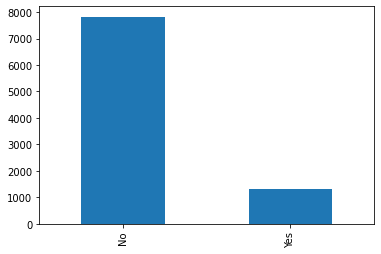

In [110]:
response_count = data_clean['response'].value_counts()

response_count.plot(kind='bar')

In [ ]:
data_clean['response_binary'] = data_clean['response'].map({'Yes': 1, 'No': 0})

data_clean.reset_index(drop=True) 

data_clean.head(10) # Test to make sure the map function passed the dictionary to the new list response_binary

<AxesSubplot:xlabel='response_binary'>

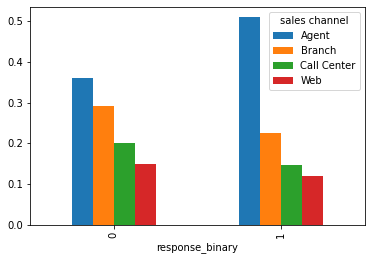

In [169]:
sales_channel_response_rate = data_clean.groupby('response_binary')['sales channel'].value_counts(normalize=True).unstack('sales channel')

sales_channel_response_rate

sales_channel_response_rate.plot(kind='bar')


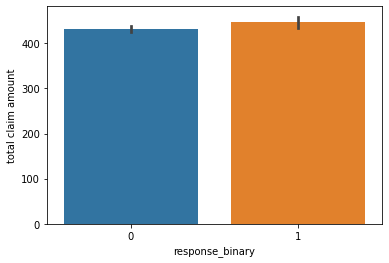

In [154]:
sns.barplot(x='response_binary', y='total claim amount', data=data_clean)
plt.show() 

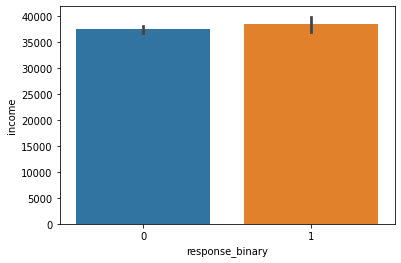

In [152]:
sns.barplot(x='response_binary', y='income', data=data_clean)
plt.show() 